In [1]:
import pandas as pd
import glob
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
path = glob.glob('raw_data/2016/monthly_weekend/*.csv')
names = path[0].split('/')
#months_list = ['jan-mar', 'apr-jun', 'jul-sep', 'oct-dec']
df = pd.DataFrame()
df.name = (f'{names[2]}_{names[1]}')

In [3]:
x = 0
for filepath in path:
    readfile = pd.read_csv(filepath)
    df_x = pd.DataFrame(readfile)
    #df_x['month'] = months_list[x]
    df_x['year'] = names[1]
    df = df.append(df_x, ignore_index=True)
    x += 1

In [4]:
df.head()

,sourceid,dstid,month,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time,year
0,67,104,10,1658.30,446.37,1607.85,1.27,2016
1,435,154,11,1334.46,486.85,1272.07,1.34,2016
2,244,107,10,607.94,297.06,554.15,1.53,2016
3,387,326,10,1016.50,468.68,933.05,1.50,2016
4,419,466,11,1040.00,321.99,986.33,1.41,2016


In [5]:
geodata = {}
geo = pd.read_json('raw_data/washington_DC_censustracts.json')
for item in geo['features']:
    mid = int(item['properties']['MOVEMENT_ID'])
    address = item['properties']['DISPLAY_NAME']
    coord = item['geometry']['coordinates'][0][0][0]
    #lon = item['geometry']['coordinates'][0][0][0][0]
    geodata[mid] = (address, *coord)

In [ ]:
for ind, row in df.iterrows():

    df.at[ind, 'departure'] = geodata[row['sourceid']][0]
    df.at[ind, 'destination'] = geodata[row['dstid']][0]
    df.at[ind, 'coord_dep'] = (f'{geodata[row["sourceid"]][2]}, {geodata[row["sourceid"]][1]}')
    df.at[ind, 'coord_dest'] = (f'{geodata[row["dstid"]][2]}, {geodata[row["dstid"]][1]}')
    

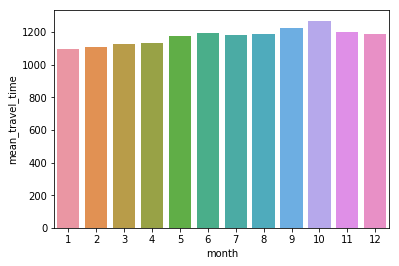

In [6]:
# Visualization of a mean travel time by hour
sns.barplot(x='month', y='mean_travel_time',
            data=(df[['mean_travel_time', 'month']].sample(frac=1)), ci=None)

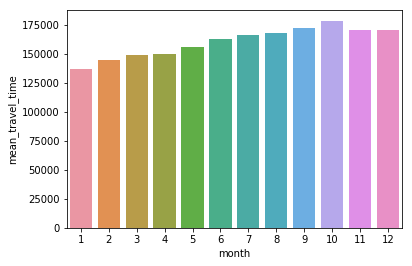

In [7]:
# Visualization of the number of rides by hour
sns.barplot(x='month', y='mean_travel_time',
                data=(df[['mean_travel_time', 'month']].groupby(['month']).count().reset_index()),
                ci=None)